In [62]:
!pip install tensorflow
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


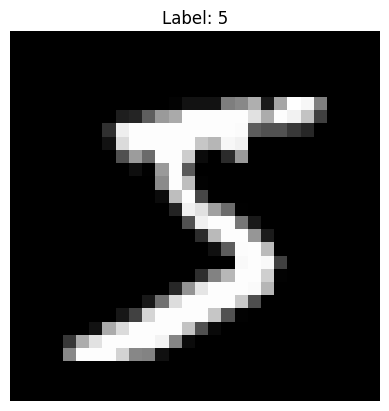

In [64]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray") # cmap="gray" to make it balck & white
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

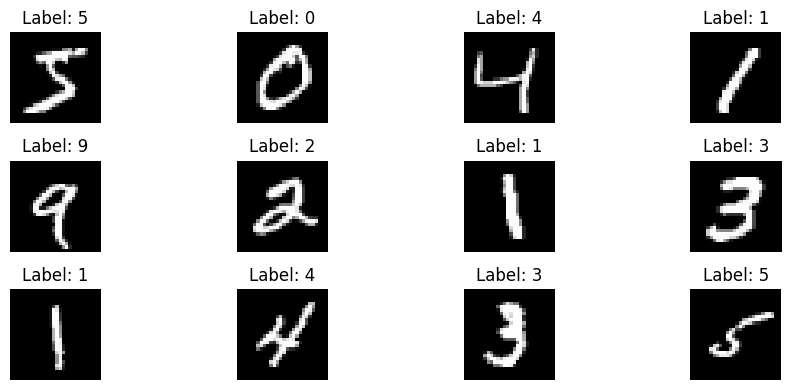

In [65]:
num_images = 12
plt.figure(figsize=(10, 4))
for i in range(num_images):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


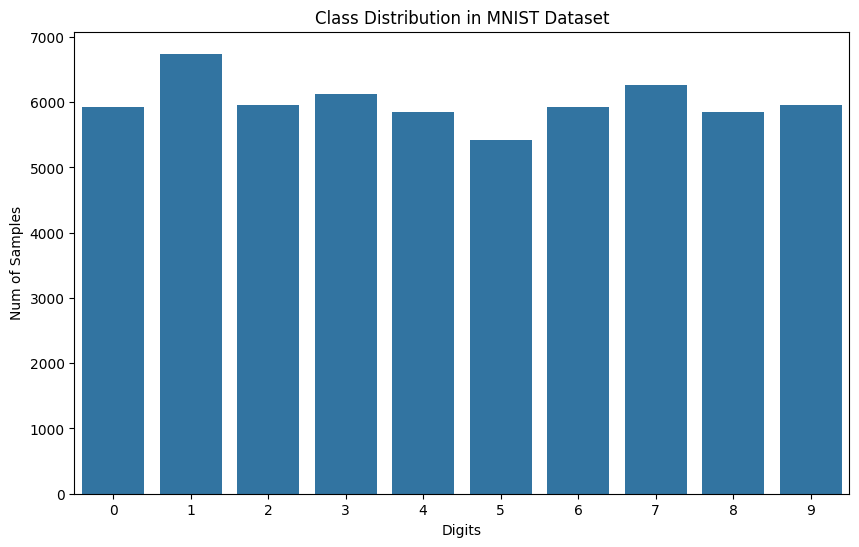

In [66]:
!pip install seaborn
!pip install numpy

import seaborn as sns
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title("Class Distribution in MNIST Dataset")
plt.xlabel("Digits")
plt.ylabel("Num of Samples")
plt.xticks(rotation=0) # force them to be horizontal
plt.show()

In [67]:
base_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

base_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#base_model.fit(x_train, y_train, epochs=5)
base_history = base_model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8769 - loss: 0.4266 - val_accuracy: 0.9581 - val_loss: 0.1397
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9647 - loss: 0.1201 - val_accuracy: 0.9635 - val_loss: 0.1185
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9777 - loss: 0.0754 - val_accuracy: 0.9743 - val_loss: 0.0819
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9822 - loss: 0.0593 - val_accuracy: 0.9745 - val_loss: 0.0848
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9870 - loss: 0.0433 - val_accuracy: 0.9757 - val_loss: 0.0797


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


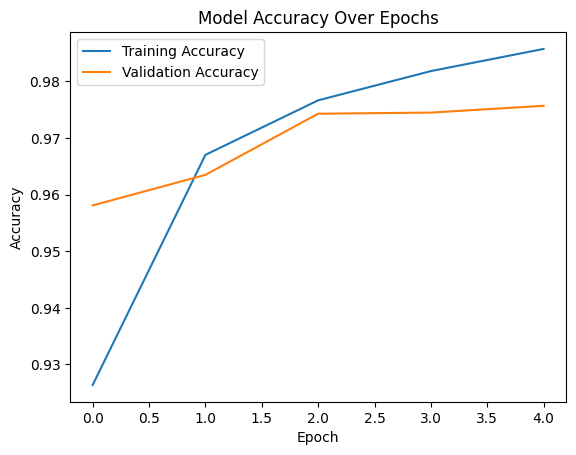

In [69]:
print(base_history.history.keys())

plt.plot(base_history.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in base_history.history:
    plt.plot(base_history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [70]:
CNNmodel = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

CNNmodel.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#CNNmodel.fit(x_train, y_train, epochs=5)
CNN_history = CNNmodel.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.5866 - loss: 1.6145 - val_accuracy: 0.8782 - val_loss: 0.4516
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8786 - loss: 0.4292 - val_accuracy: 0.9018 - val_loss: 0.3474
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8953 - loss: 0.3539 - val_accuracy: 0.9099 - val_loss: 0.3177
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9046 - loss: 0.3250 - val_accuracy: 0.9119 - val_loss: 0.3029
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9059 - loss: 0.3184 - val_accuracy: 0.9144 - val_loss: 0.2937


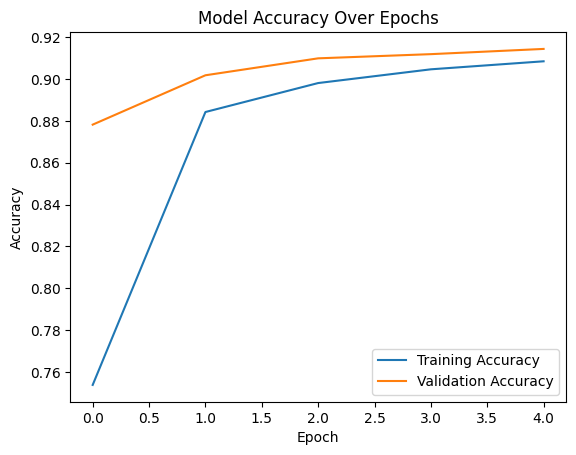

In [72]:
plt.plot(CNN_history.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in CNN_history.history:
    plt.plot(CNN_history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

what if we run them for longer does that help?

In [73]:
base_history_lt = base_model.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4036 - loss: 2.1621 - val_accuracy: 0.6884 - val_loss: 1.5246
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7360 - loss: 1.2551 - val_accuracy: 0.8587 - val_loss: 0.6739
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8570 - loss: 0.6072 - val_accuracy: 0.8919 - val_loss: 0.4271
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8919 - loss: 0.4155 - val_accuracy: 0.9068 - val_loss: 0.3435
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9071 - loss: 0.3364 - val_accuracy: 0.9162 - val_loss: 0.3030
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9128 - loss: 0.3055 - val_accuracy: 0.9170 - val_loss: 0.2824
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9201 - loss: 0.2826 - val_accuracy: 0.9248 - val_loss: 0.2624
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9226 - loss: 0.269

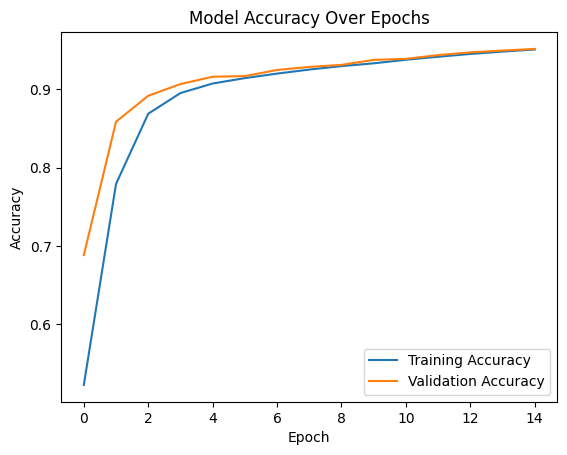

In [74]:
plt.plot(base_history_lt.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in base_history_lt.history:
    plt.plot(base_history_lt.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [75]:
CNN_history_lt = CNNmodel.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test) # for val accuracy
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9105 - loss: 0.3075 - val_accuracy: 0.9168 - val_loss: 0.2881
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9109 - loss: 0.3049 - val_accuracy: 0.9162 - val_loss: 0.2840
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9138 - loss: 0.2983 - val_accuracy: 0.9182 - val_loss: 0.2798
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9167 - loss: 0.2882 - val_accuracy: 0.9213 - val_loss: 0.2743
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9170 - loss: 0.2883 - val_accuracy: 0.9193 - val_loss: 0.2764
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9190 - loss: 0.2784 - val_accuracy: 0.9193 - val_loss: 0.2774
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9198 - loss: 0.2833 - val_accuracy: 0.9201 - val_loss: 0.2768
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9191 - loss: 0

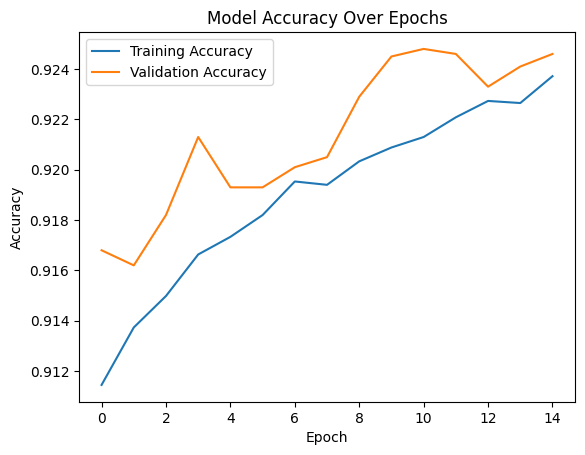

In [76]:
plt.plot(CNN_history_lt.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in CNN_history_lt.history:
    plt.plot(CNN_history_lt.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

Extra visualizations on how the machine identifies the numbers

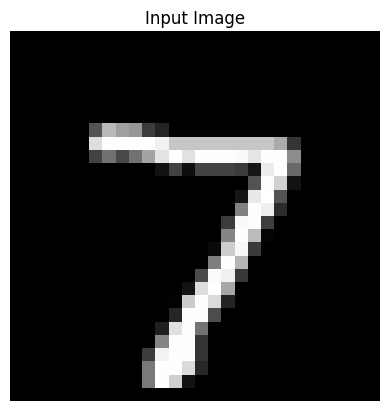

In [77]:
img = x_test[0] # first image from test set
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Input Image")
plt.axis("off")
plt.show()

In [78]:
pred = np.argmax(CNNmodel.predict(img[np.newaxis, ...]))
print(f"Predicted class: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Predicted class: 7


In [79]:
for i, layer in enumerate(CNNmodel.layers):
    print(i, layer.name)

0 reshape_2
1 conv2d_1
2 max_pooling2d_1
3 flatten_4
4 dense_6


In [80]:
import tensorflow as tf

# i had problems showingcasing anything from my previous models due to some unknown errors, so i recreated the model here*
#CNNmodel = keras.Sequential([
#    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
#    keras.layers.Conv2D(32, (3, 3), activation="relu"),
#    keras.layers.MaxPooling2D((2, 2)),
#    keras.layers.Flatten(),
#    keras.layers.Dense(10, activation="softmax")
#])

inputs = tf.keras.Input(shape=(28, 28), name="input_layer")
x = tf.keras.layers.Reshape((28, 28, 1))(inputs)
x = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="valid", name="conv1")(x) # valid padding to be the same as the original one
x = tf.keras.layers.MaxPooling2D((2, 2), name="pool1")(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

functional_model = tf.keras.Model(inputs=inputs, outputs=outputs)
functional_model.set_weights(CNNmodel.get_weights())


* *Apparently sequential models cannot do this line "activation_model = tf.keras.Model(inputs=functional_model.input, outputs=layer_outputs)"
because the tensors are "skipped" when they are made in sequential models but when they are explicity made with tensors as i did now they work well

After some consideration i decided to not commit my tries because whatever I tried it simply didn"t work so I just gave up with trying it

In [81]:
target_digit = 6
indices = np.where(y_train == target_digit)[0] # get the first digit for whatever digit i want
img = x_train[indices[0]]

layer_outputs = [functional_model.get_layer("conv1").output]
activation_model = tf.keras.Model(inputs=functional_model.input, outputs=layer_outputs)
activations = activation_model.predict(img[np.newaxis, ...], verbose=0)[0]

activity_per_filter = np.sum(activations, axis=(0, 1)) #activity is all the pixel values summed up

top_indices = np.argsort(activity_per_filter)[::-1][:10] # top 10 most used filters

print(f"10 most active filters: {top_indices}")
print(f"Activity values: {activity_per_filter[top_indices]}")

10 most active filters: [ 2  0  1  8 21 26 27 28 19 13]
Activity values: [69.42753   18.382147  16.033817  15.418287  14.6061945 14.065087
 13.997575  13.988933  13.68159   13.414589 ]


Let"s see visually 

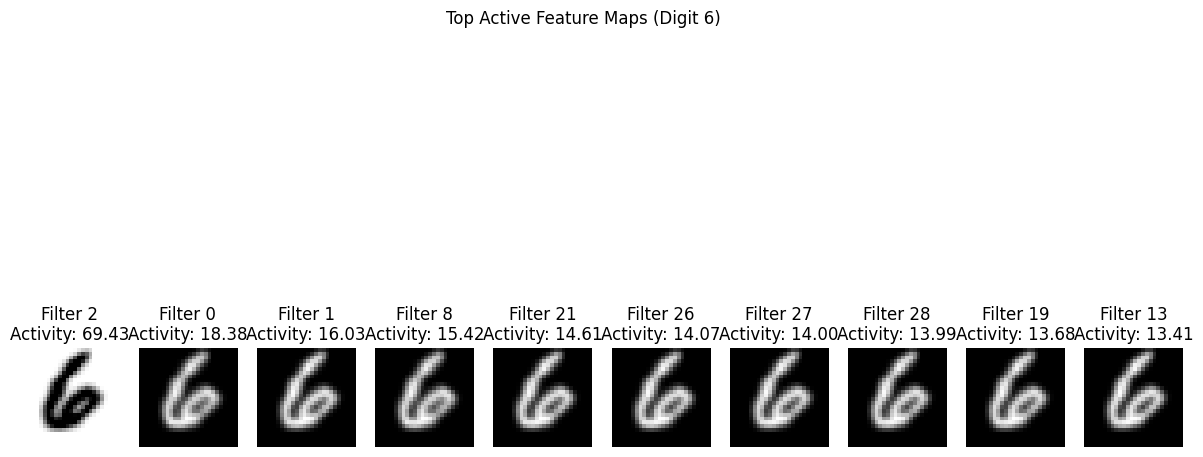

In [82]:
fig, axes = plt.subplots(1, 10, figsize=(15, 8))
for plot_idx, filter_idx in enumerate(top_indices):
    ax = axes[plot_idx]
    feature_map = activations[:, :, filter_idx]
    
    # only get those that are actually used + normalize them
    if feature_map.max() > 0:
        feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())
    
    ax.imshow(feature_map, cmap="gray")
    ax.set_title(f"Filter {filter_idx}\nActivity: {activity_per_filter[filter_idx]:.2f}")
    ax.axis("off")

plt.suptitle(f"Top Active Feature Maps (Digit {target_digit})")
plt.show()

Since all of them look the same lets see if the kernels that go through them are also the same or not

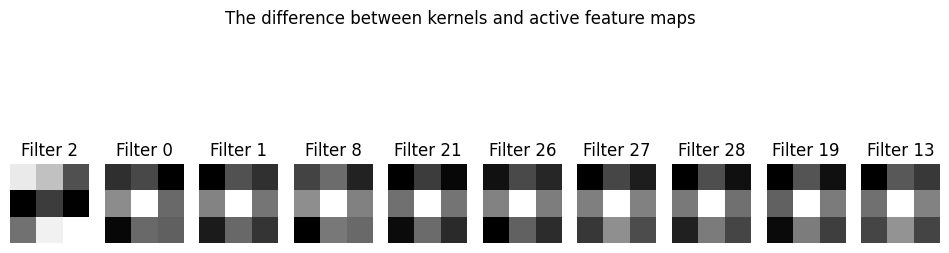

In [83]:
weights = CNNmodel.layers[1].get_weights()[0] # get all weights from the first Conv2D layer

fig, axes = plt.subplots(1, 10, figsize=(12, 4))
for i, idx in enumerate(top_indices):
    ax = axes[i]
    # get the specific 3x3 kernel for this filter
    kernel = weights[:, :, 0, idx]
    kernel_norm = (kernel - kernel.min()) / (kernel.max() - kernel.min())
    
    ax.imshow(kernel_norm, cmap="gray")
    ax.set_title(f"Filter {idx}")
    ax.axis("off")

plt.suptitle("The difference between kernels and active feature maps")
plt.show()

fashion MNIST with the same models

In [84]:
(fx_train, fy_train), (fx_test, fy_test) = keras.datasets.fashion_mnist.load_data()

print(fx_train.shape)  # (60000, 28, 28)
print(fy_train.shape)  # (60000,)

(60000, 28, 28)
(60000,)


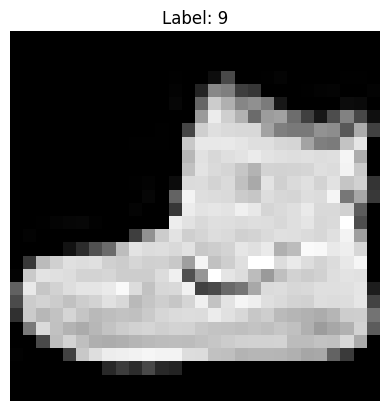

In [85]:
plt.imshow(fx_train[0], cmap="gray") # cmap="gray" to make it balck & white
plt.title(f"Label: {fy_train[0]}")
plt.axis("off")
plt.show()

In [ ]:
# Normalize pixel values to [0,1]
fx_train = fx_train / 255.0
fx_test = fx_test / 255.0

In [86]:
base_history_f = base_model.fit(
    fx_train, fy_train,
    epochs=20,
    validation_data=(fx_test, fy_test)
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5096 - loss: 42391.4609 - val_accuracy: 0.7145 - val_loss: 1872.8575
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7333 - loss: 1410.9139 - val_accuracy: 0.7616 - val_loss: 805.1569
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7745 - loss: 610.9116 - val_accuracy: 0.7760 - val_loss: 440.3127
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7984 - loss: 312.5093 - val_accuracy: 0.7934 - val_loss: 252.2222
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8098 - loss: 160.2152 - val_accuracy: 0.7942 - val_loss: 165.0372
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8156 - loss: 103.9977 - val_accuracy: 0.8110 - val_loss: 123.8979
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8155 - loss: 71.7623 - val_accuracy: 0.7950 - val_loss: 103.0319
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/st

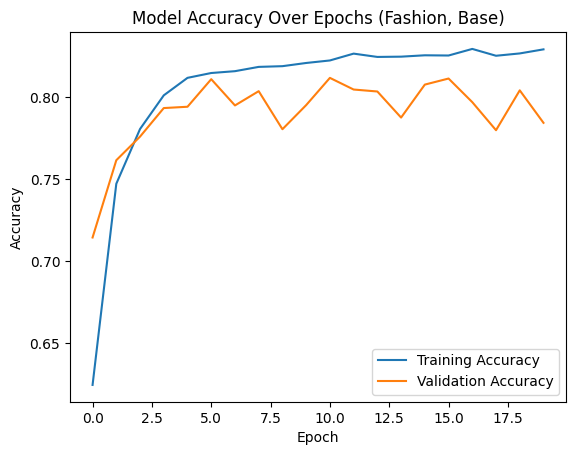

In [87]:
plt.plot(base_history_f.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in base_history_f.history:
    plt.plot(base_history_f.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs (Fashion, Base)")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [88]:
CNN_history_f = CNNmodel.fit(
    fx_train, fy_train,
    epochs=20,
    validation_data=(fx_test, fy_test)
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4965 - loss: 109099.9609 - val_accuracy: 0.7199 - val_loss: 17065.5469
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7350 - loss: 13247.1357 - val_accuracy: 0.7516 - val_loss: 8018.5063
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7657 - loss: 6647.9863 - val_accuracy: 0.7730 - val_loss: 4782.4150
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7769 - loss: 4055.7017 - val_accuracy: 0.7787 - val_loss: 3091.8066
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7831 - loss: 2508.3223 - val_accuracy: 0.7771 - val_loss: 1935.4612
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7874 - loss: 1612.0414 - val_accuracy: 0.7878 - val_loss: 1186.2567
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7901 - loss: 1046.8247 - val_accuracy: 0.7822 - val_loss: 792.5896
Epoch 8/20
1875/1875 ━━━━━━━━━━━━

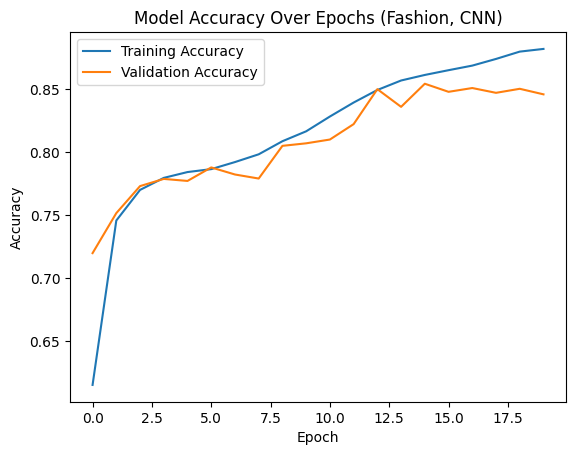

In [89]:
plt.plot(CNN_history_f.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in CNN_history_f.history:
    plt.plot(CNN_history_f.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs (Fashion, CNN)")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

pretty good basic scores, but fluctuates a lot which is expected due to varience

Next i will look at what are some ambiguous pictures

In [90]:
probs = base_model.predict(fx_test)
conf = np.max(probs, axis=1)
pred_labels = np.argmax(probs, axis=1)
ambi = np.where(conf < 0.8)[0]
print(f"Ambiguous samples: {len(ambi)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Ambiguous samples: 158


Now lets also look at these cases visually, where it is easy to see why the AI made mistakes

These are the classes and their names, better than juts 0-9

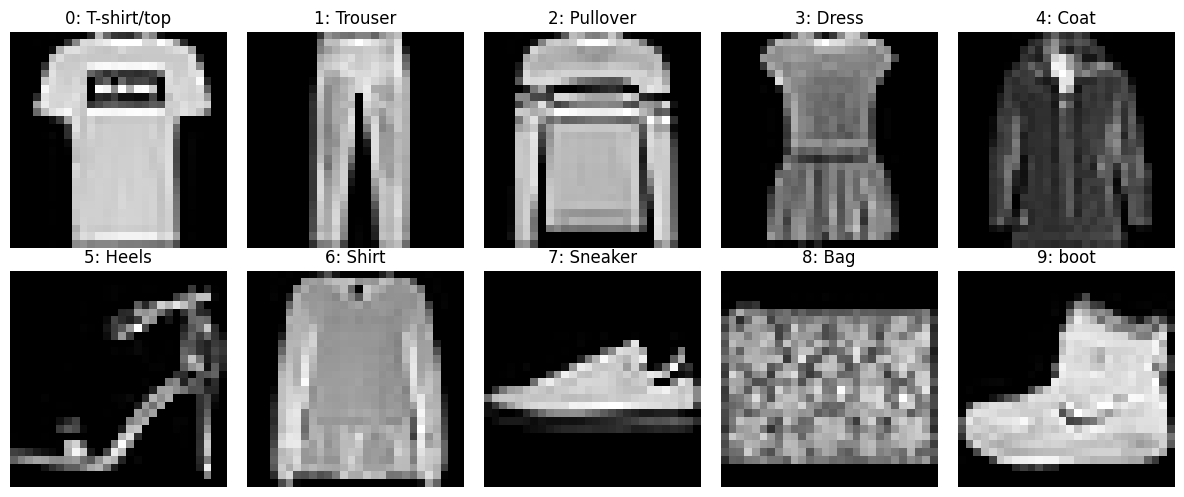

In [91]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Heels", "Shirt", "Sneaker", "Bag", "boot"]

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for label in range(10):
    idx = np.where(fy_train == label)[0][0] # apparently you can do this in numpy, thanks AI!
    row, col = divmod(label, 5)
    axes[row, col].imshow(fx_train[idx], cmap="gray")
    axes[row, col].set_title(f"{label}: {class_names[label]}")
    axes[row, col].axis("off")
plt.tight_layout()
plt.show()


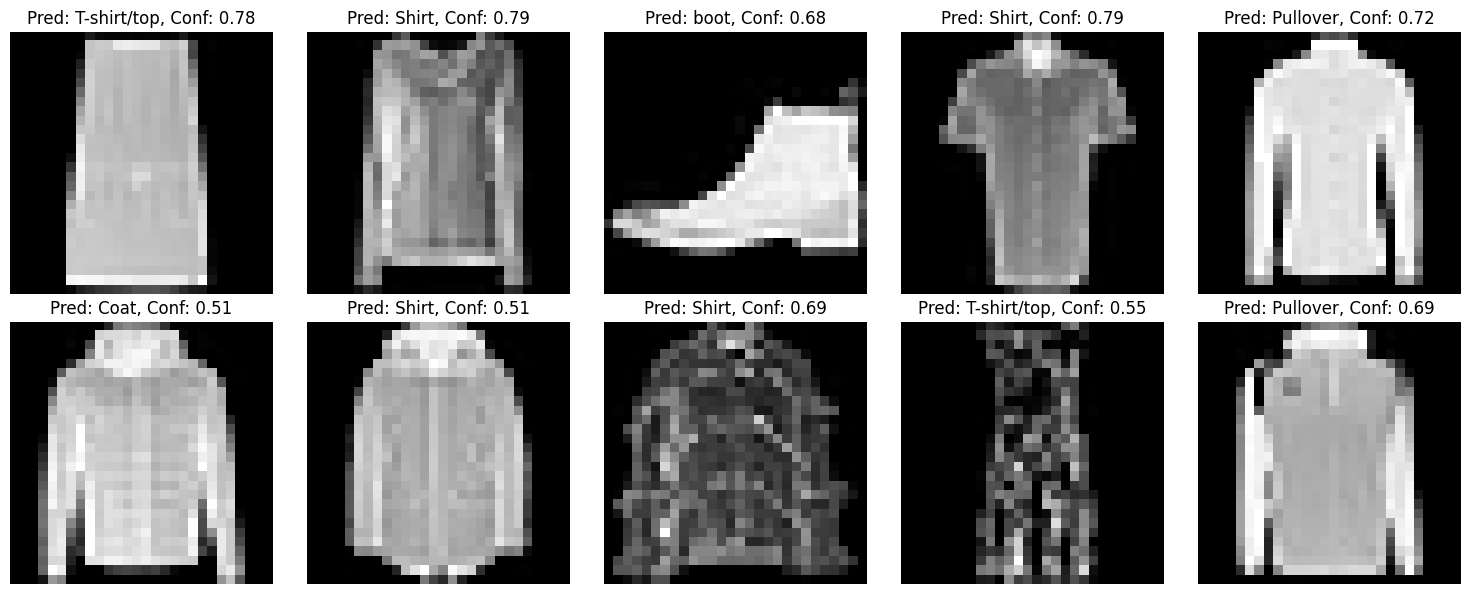

In [92]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
ambi = np.sort(ambi)
for i, idx in enumerate(ambi[:10]):
    row, col = divmod(i, 5)
    axes[row, col].imshow(fx_test[idx].squeeze(), cmap="gray")
    top_prob = np.max(probs[idx])
    top_class = class_names[pred_labels[idx]]
    axes[row, col].set_title(f"Pred: {top_class}, Conf: {top_prob:.2f}")
    axes[row, col].axis("off")
plt.tight_layout()
plt.show()

### Extra section for the live coding task
Should be 10 lines of code, will probably make some pretty graphs